# DF CON VARIABLES DE 4 HORAS #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error


In [ ]:
import requests
import pandas as pd
import time

def get_binance_ohlcv(symbol="BTCUSDT", interval="1h", days=1095):
    """
    Descarga velas OHLCV desde Binance.
    symbol: par de trading (ej: BTCUSDT)
    interval: intervalo de vela (ej: 1h, 1d, 15m)
    days: días de datos hacia atrás
    """
    base_url = "https://api.binance.com/api/v3/klines"
    
    # Binance limita 1000 velas por request → dividir en chunks
    limit = 1000
    ms_interval = 60 * 60 * 1000  # 1h en milisegundos
    if interval == "1d":
        ms_interval = 24 * 60 * 60 * 1000
    
    end_time = int(time.time() * 1000)  # ahora en ms
    start_time = end_time - days * 24 * 60 * 60 * 1000
    
    all_data = []
    
    while start_time < end_time:
        params = {
            "symbol": symbol,
            "interval": interval,
            "startTime": start_time,
            "limit": limit
        }
        resp = requests.get(base_url, params=params)
        data = resp.json()
        
        if not data:
            break
        
        all_data.extend(data)
        
        # avanzar el start_time al último timestamp + intervalo
        last_open_time = data[-1][0]
        start_time = last_open_time + ms_interval
        
        time.sleep(0.2)  # para no sobrecargar la API
    
    # convertir a DataFrame
    df = pd.DataFrame(all_data, columns=[
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base", "taker_buy_quote", "ignore"
    ])
    
    # limpiar tipos de datos
    df["open_time"] = pd.to_datetime(df["open_time"], unit="ms")
    df["close_time"] = pd.to_datetime(df["close_time"], unit="ms")
    for col in ["open", "high", "low", "close", "volume"]:
        df[col] = df[col].astype(float)
    
    return df[["open_time", "open", "high", "low", "close", "volume"]]

# ======================
# 🚀 Descargar datos
# ======================
df = get_binance_ohlcv("BTCUSDT", "1h", days=1095)

# guardar en CSV
df.to_csv("BTCUSDT_1h_3years.csv", index=False)


print(df.head())
print(df.tail())


✅ Datos descargados y guardados en BTCUSDT_1h_3years.csv
            open_time      open      high       low     close       volume
0 2022-09-27 22:00:00  18993.43  19101.30  18926.91  19080.20  17911.99732
1 2022-09-27 23:00:00  19079.50  19169.39  19066.36  19079.13  16337.56782
2 2022-09-28 00:00:00  19078.10  19238.28  19070.22  19096.83  21441.13215
3 2022-09-28 01:00:00  19095.87  19146.85  18936.49  19003.85  21054.97507
4 2022-09-28 02:00:00  19003.85  19016.16  18471.28  18634.02  28783.01284
                open_time       open       high        low      close  \
26274 2025-09-26 17:00:00  109460.00  110000.00  109392.35  109899.99   
26275 2025-09-26 18:00:00  109900.00  110300.00  109700.00  109727.99   
26276 2025-09-26 19:00:00  109727.99  109727.99  109030.41  109172.20   
26277 2025-09-26 20:00:00  109172.21  109347.59  109087.57  109288.44   
26278 2025-09-26 21:00:00  109288.45  109288.45  109221.55  109232.07   

          volume  
26274  627.01224  
26275  571.22129

In [3]:
df

,open_time,open,high,low,close,volume
0,2022-09-27 22:00:00,18993.43,19101.30,18926.91,19080.20,17911.99732
1,2022-09-27 23:00:00,19079.50,19169.39,19066.36,19079.13,16337.56782
2,2022-09-28 00:00:00,19078.10,19238.28,19070.22,19096.83,21441.13215
3,2022-09-28 01:00:00,19095.87,19146.85,18936.49,19003.85,21054.97507
4,2022-09-28 02:00:00,19003.85,19016.16,18471.28,18634.02,28783.01284
...,...,...,...,...,...,...
26274,2025-09-26 17:00:00,109460.00,110000.00,109392.35,109899.99,627.01224
26275,2025-09-26 18:00:00,109900.00,110300.00,109700.00,109727.99,571.22129
26276,2025-09-26 19:00:00,109727.99,109727.99,109030.41,109172.20,603.81607
26277,2025-09-26 20:00:00,109172.21,109347.59,109087.57,109288.44,245.23004


In [4]:
#df=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/src/BTCUSDT_1h_3years.csv")+

In [5]:
#vamos a ver como funciona sin el volumen
df_porcentual=pd.DataFrame(columns=["4hora%","dia%","2dias%","1semana%"])
def porcentaje (df,columna_objetivo,n_de_intervalos,columna_nueva):

    for i in range(n_de_intervalos,len(df[columna_objetivo])):
        cambio=(df[columna_objetivo][i-n_de_intervalos]-df[columna_objetivo][i])/df[columna_objetivo][i-n_de_intervalos]
        df.loc[i,columna_nueva]=cambio*100

porcentaje(df,"close",1,"1hora%")
porcentaje(df,"close",4,"4hora%")
porcentaje(df,"close",8,"8hora%")
porcentaje(df,"close",24,"dia%")
porcentaje(df,"close",48,"2dias%")
porcentaje(df,"close",24*7,"1semana%")
porcentaje(df,"close",24*7*2,"2semanas%")
porcentaje(df,"close",24*7*4,"1mes%")
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [6]:
df_porcentual=df

In [7]:
df_porcentual["pred_dia%"]=df_porcentual["dia%"].shift(-24)

In [8]:

def calcular_RSI(df, column="close", period=14):
    """
    Calcula el RSI (Relative Strength Index) de un DataFrame.
    
    Parámetros:
        df: DataFrame con la columna de precios.
        column: columna sobre la cual calcular el RSI (por defecto 'close').
        period: ventana del RSI (por defecto 14).
        
    Retorna:
        DataFrame con una columna adicional 'RSI'.
    """
    # Calcular diferencias entre cierres
    delta = df[column].diff()

    # Separar ganancias y pérdidas
    ganancias = delta.clip(lower=0)
    perdidas = -delta.clip(upper=0)

    # Calcular medias móviles exponenciales
    media_gan = ganancias.ewm(span=period, adjust=False).mean()
    media_per = perdidas.ewm(span=period, adjust=False).mean()

    # Calcular RS y RSI
    RS = media_gan / media_per
    RSI = 100 - (100 / (1 + RS))

    df["RSI"] = RSI
    return df
calcular_RSI(df_porcentual)

,open_time,open,high,low,close,volume,1hora%,4hora%,8hora%,dia%,2dias%,1semana%,2semanas%,1mes%,pred_dia%,RSI
0,2022-10-25 22:00:00,20231.00,20235.41,19981.12,20063.30,9074.95346,0.835298,1.038286,-2.941192,-3.626699,-2.400556,-3.844621,-5.373811,-5.152462,-3.756959,NaN
1,2022-10-25 23:00:00,20063.30,20135.35,20039.29,20080.07,8544.85676,-0.083585,0.952344,-1.679066,-3.881846,-2.604290,-3.894101,-5.351889,-5.246256,-3.443813,100.000000
2,2022-10-26 00:00:00,20079.02,20175.99,20050.41,20167.02,12223.51304,-0.433016,0.108822,-1.783519,-4.444980,-3.320897,-4.850889,-5.629795,-5.604019,-2.913222,100.000000
3,2022-10-26 01:00:00,20165.80,20293.78,20083.59,20230.32,13211.39217,-0.313879,0.009786,-0.555557,-4.833184,-4.213014,-4.753280,-6.122149,-6.453798,-2.448305,100.000000
4,2022-10-26 02:00:00,20230.32,20260.85,20172.59,20210.63,9887.22217,0.097329,-0.734326,0.311584,-4.653763,-4.099733,-4.768992,-6.001179,-8.460923,-2.347428,91.119990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25602,2025-09-26 17:00:00,109460.00,110000.00,109392.35,109899.99,627.01224,-0.401955,-0.209958,-0.302340,-0.979807,3.394221,4.883682,5.107423,-1.322055,NaN,60.243784
25603,2025-09-26 18:00:00,109900.00,110300.00,109700.00,109727.99,571.22129,0.156506,-0.819573,-0.764948,0.029346,3.442289,4.921258,5.801710,-1.463391,NaN,55.967690
25604,2025-09-26 19:00:00,109727.99,109727.99,109030.41,109172.20,603.81607,0.506516,-0.132462,-0.035461,0.171726,3.745203,5.170826,6.396424,-0.887323,NaN,44.255620
25605,2025-09-26 20:00:00,109172.21,109347.59,109087.57,109288.44,245.23004,-0.106474,0.156742,0.077021,-0.114507,3.711915,5.248825,5.913437,-1.408230,NaN,46.935369


In [ ]:
def agregar_emas(df, column="close", spans=[9, 21, 50, 100,200]):

    for span in spans:
        df[f"EMA_{span}"] = df[column].ewm(span=span, adjust=False).mean()
    return df
agregar_emas(df_porcentual)

,open_time,open,high,low,close,volume,1hora%,4hora%,8hora%,dia%,...,1semana%,2semanas%,1mes%,pred_dia%,RSI,EMA_9,EMA_21,EMA_50,EMA_100,EMA_200
0,2022-10-25 22:00:00,20231.00,20235.41,19981.12,20063.30,9074.95346,0.835298,1.038286,-2.941192,-3.626699,...,-3.844621,-5.373811,-5.152462,-3.756959,NaN,20063.300000,20063.300000,20063.300000,20063.300000,20063.300000
1,2022-10-25 23:00:00,20063.30,20135.35,20039.29,20080.07,8544.85676,-0.083585,0.952344,-1.679066,-3.881846,...,-3.894101,-5.351889,-5.246256,-3.443813,100.000000,20066.654000,20064.824545,20063.957647,20063.632079,20063.466866
2,2022-10-26 00:00:00,20079.02,20175.99,20050.41,20167.02,12223.51304,-0.433016,0.108822,-1.783519,-4.444980,...,-4.850889,-5.629795,-5.604019,-2.913222,100.000000,20086.727200,20074.115041,20067.999308,20065.679365,20064.497245
3,2022-10-26 01:00:00,20165.80,20293.78,20083.59,20230.32,13211.39217,-0.313879,0.009786,-0.555557,-4.833184,...,-4.753280,-6.122149,-6.453798,-2.448305,100.000000,20115.445760,20088.315492,20074.364825,20068.939575,20066.147223
4,2022-10-26 02:00:00,20230.32,20260.85,20172.59,20210.63,9887.22217,0.097329,-0.734326,0.311584,-4.653763,...,-4.768992,-6.001179,-8.460923,-2.347428,91.119990,20134.482608,20099.434993,20079.708558,20071.745326,20067.584862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25602,2025-09-26 17:00:00,109460.00,110000.00,109392.35,109899.99,627.01224,-0.401955,-0.209958,-0.302340,-0.979807,...,4.883682,5.107423,-1.322055,NaN,60.243784,109405.159201,109599.603360,110475.001912,111591.609571,112829.617945
25603,2025-09-26 18:00:00,109900.00,110300.00,109700.00,109727.99,571.22129,0.156506,-0.819573,-0.764948,0.029346,...,4.921258,5.801710,-1.463391,NaN,55.967690,109469.725361,109611.274872,110445.707327,111554.706214,112798.755976
25604,2025-09-26 19:00:00,109727.99,109727.99,109030.41,109172.20,603.81607,0.506516,-0.132462,-0.035461,0.171726,...,5.170826,6.396424,-0.887323,NaN,44.255620,109410.220289,109571.358975,110395.765863,111507.527873,112762.670842
25605,2025-09-26 20:00:00,109172.21,109347.59,109087.57,109288.44,245.23004,-0.106474,0.156742,0.077021,-0.114507,...,5.248825,5.913437,-1.408230,NaN,46.935369,109385.864231,109545.639068,110352.341320,111463.585539,112728.101381


In [10]:
df_porcentual

,open_time,open,high,low,close,volume,1hora%,4hora%,8hora%,dia%,...,1semana%,2semanas%,1mes%,pred_dia%,RSI,EMA_9,EMA_21,EMA_50,EMA_100,EMA_200
0,2022-10-25 22:00:00,20231.00,20235.41,19981.12,20063.30,9074.95346,0.835298,1.038286,-2.941192,-3.626699,...,-3.844621,-5.373811,-5.152462,-3.756959,NaN,20063.300000,20063.300000,20063.300000,20063.300000,20063.300000
1,2022-10-25 23:00:00,20063.30,20135.35,20039.29,20080.07,8544.85676,-0.083585,0.952344,-1.679066,-3.881846,...,-3.894101,-5.351889,-5.246256,-3.443813,100.000000,20066.654000,20064.824545,20063.957647,20063.632079,20063.466866
2,2022-10-26 00:00:00,20079.02,20175.99,20050.41,20167.02,12223.51304,-0.433016,0.108822,-1.783519,-4.444980,...,-4.850889,-5.629795,-5.604019,-2.913222,100.000000,20086.727200,20074.115041,20067.999308,20065.679365,20064.497245
3,2022-10-26 01:00:00,20165.80,20293.78,20083.59,20230.32,13211.39217,-0.313879,0.009786,-0.555557,-4.833184,...,-4.753280,-6.122149,-6.453798,-2.448305,100.000000,20115.445760,20088.315492,20074.364825,20068.939575,20066.147223
4,2022-10-26 02:00:00,20230.32,20260.85,20172.59,20210.63,9887.22217,0.097329,-0.734326,0.311584,-4.653763,...,-4.768992,-6.001179,-8.460923,-2.347428,91.119990,20134.482608,20099.434993,20079.708558,20071.745326,20067.584862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25602,2025-09-26 17:00:00,109460.00,110000.00,109392.35,109899.99,627.01224,-0.401955,-0.209958,-0.302340,-0.979807,...,4.883682,5.107423,-1.322055,NaN,60.243784,109405.159201,109599.603360,110475.001912,111591.609571,112829.617945
25603,2025-09-26 18:00:00,109900.00,110300.00,109700.00,109727.99,571.22129,0.156506,-0.819573,-0.764948,0.029346,...,4.921258,5.801710,-1.463391,NaN,55.967690,109469.725361,109611.274872,110445.707327,111554.706214,112798.755976
25604,2025-09-26 19:00:00,109727.99,109727.99,109030.41,109172.20,603.81607,0.506516,-0.132462,-0.035461,0.171726,...,5.170826,6.396424,-0.887323,NaN,44.255620,109410.220289,109571.358975,110395.765863,111507.527873,112762.670842
25605,2025-09-26 20:00:00,109172.21,109347.59,109087.57,109288.44,245.23004,-0.106474,0.156742,0.077021,-0.114507,...,5.248825,5.913437,-1.408230,NaN,46.935369,109385.864231,109545.639068,110352.341320,111463.585539,112728.101381


In [11]:
def volumen_por_precio(df, price_col="close", volume_col="volume", bins=100):
    """
    Calcula volumen por nivel de precio (Volume Profile).
    
    Parámetros:
        df: DataFrame con precios y volúmenes.
        price_col: columna de precios (por defecto 'close').
        volume_col: columna de volúmenes (por defecto 'volume').
        bins: número de intervalos de precio.
    
    Retorna:
        DataFrame con niveles de precio y volumen acumulado.
    """
    precios = df[price_col]
    volumenes = df[volume_col]

    # Crear bins de precio
    hist, edges = np.histogram(precios, bins=bins, weights=volumenes)

    # Calcular punto medio de cada bin
    price_levels = (edges[:-1] + edges[1:]) / 2

    vp = pd.DataFrame({"price_level": price_levels, "volume": hist})
    vp = vp.sort_values(by="volume", ascending=False).reset_index(drop=True)
    return vp
resistencias=volumen_por_precio(df_porcentual)

In [12]:
resistencias

,price_level,volume
0,17272.49465,8.134736e+06
1,22682.41015,6.201472e+06
2,20518.44395,6.023987e+06
3,16190.51155,5.191254e+06
4,23764.39325,4.801953e+06
...,...,...
95,120060.88915,4.143653e+04
96,122224.85535,2.819672e+04
97,121142.87225,1.982579e+04
98,123306.83845,6.901755e+03


In [13]:
#agregamos precios de resistencias
#vamos a poner 1 en cada zona de resistencia y 0 en donde no hay resistencias de volumen 
resis=[]
df_porcentual["resistencia"]=0
lista_redondeada_high = [round(x, 0) for x in list(df_porcentual["high"])]
lista_redondeada_low = [round(x, 0) for x in list(df_porcentual["low"])]
lista_redondeada_close = [round(x, 0) for x in list(df_porcentual["close"])]
for i in list(round(resistencias["price_level"],0)):
    if i in lista_redondeada_high:

        indice=lista_redondeada_high.index(i)
        df_porcentual.loc[indice,"resistencia"]=1
    elif i in lista_redondeada_low:

        indice=lista_redondeada_low.index(i)
        df_porcentual.loc[indice,"resistencia"]=1
    elif i in lista_redondeada_close:

        indice=lista_redondeada_close.index(i)
        df_porcentual.loc[indice,"resistencia"]=1

In [14]:
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)

In [15]:
#vamos a asignar un valor a cada valor de volumen localizado


In [16]:
#zonas de bajo volumen, mayor movimiento


In [17]:
df_porcentual

,open_time,open,high,low,close,volume,1hora%,4hora%,8hora%,dia%,...,2semanas%,1mes%,pred_dia%,RSI,EMA_9,EMA_21,EMA_50,EMA_100,EMA_200,resistencia
0,2022-10-25 23:00:00,20063.30,20135.35,20039.29,20080.07,8544.85676,-0.083585,0.952344,-1.679066,-3.881846,...,-5.351889,-5.246256,-3.443813,100.000000,20066.654000,20064.824545,20063.957647,20063.632079,20063.466866,0
1,2022-10-26 00:00:00,20079.02,20175.99,20050.41,20167.02,12223.51304,-0.433016,0.108822,-1.783519,-4.444980,...,-5.629795,-5.604019,-2.913222,100.000000,20086.727200,20074.115041,20067.999308,20065.679365,20064.497245,0
2,2022-10-26 01:00:00,20165.80,20293.78,20083.59,20230.32,13211.39217,-0.313879,0.009786,-0.555557,-4.833184,...,-6.122149,-6.453798,-2.448305,100.000000,20115.445760,20088.315492,20074.364825,20068.939575,20066.147223,0
3,2022-10-26 02:00:00,20230.32,20260.85,20172.59,20210.63,9887.22217,0.097329,-0.734326,0.311584,-4.653763,...,-6.001179,-8.460923,-2.347428,91.119990,20134.482608,20099.434993,20079.708558,20071.745326,20067.584862,0
4,2022-10-26 03:00:00,20211.94,20308.00,20181.99,20251.17,9868.02662,-0.200588,-0.852089,0.108370,-4.700388,...,-6.312442,-8.031303,-2.489535,92.666964,20157.820086,20113.229084,20086.432536,20075.298290,20069.411580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25577,2025-09-25 17:00:00,110957.28,110968.40,108654.00,108833.63,2899.70308,1.913944,1.951685,2.453985,4.331587,...,5.023316,3.162580,-0.979807,13.982698,110913.168220,111604.948207,112247.219459,112955.085633,113765.251538,0
25578,2025-09-25 18:00:00,108833.63,109801.78,108631.51,109760.20,1427.42291,-0.851364,1.595661,1.691017,3.413945,...,3.982203,2.325627,0.029346,32.479780,110682.574576,111437.243824,112149.689284,112891.820571,113725.400279,0
25579,2025-09-25 19:00:00,109760.20,109973.40,109302.54,109360.00,1217.19366,0.364613,1.990280,1.785394,3.579624,...,4.422295,2.271072,0.171726,29.335916,110418.059661,111248.403477,112040.289704,112821.883530,113681.963460,0
25580,2025-09-25 20:00:00,109360.00,109482.62,109057.06,109163.44,424.71820,0.179737,1.616703,1.752806,3.822046,...,4.574068,2.447711,-0.114507,27.810376,110167.135729,111058.861342,111927.472069,112749.439103,113637.003027,0


In [104]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["open_time","pred_dia%"]
medir="pred_dia%"
for i in range(81):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[20000+i:25000+i]
    outsider=df_porcentual[25000+i+1:25000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=RandomForestRegressor( n_estimators=50, random_state=42)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [107]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')

error_aciertos: 0.5681021668114845
n_aciertos: 0.7777777777777778
error total: 0.13150608173392597


<Axes: xlabel='None', ylabel='real'>

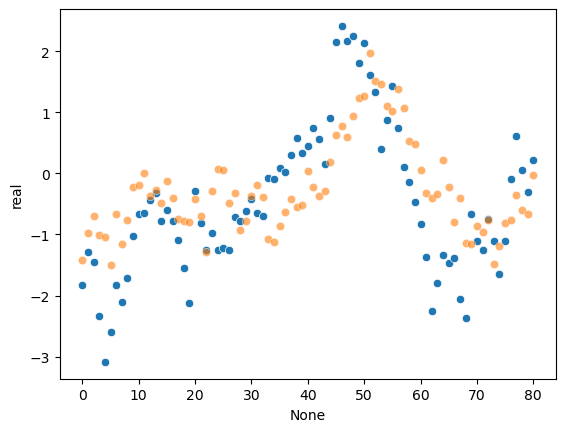

In [108]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)

In [21]:
guardados

,real,predicciones,dif
0,0.157623,-0.071276,NaN
1,0.248156,-0.580957,NaN
2,-0.059114,-0.629172,NaN
3,-0.198001,-0.546295,NaN
4,0.392264,-0.469459,NaN
...,...,...,...
76,-0.979807,-0.019914,NaN
77,0.029346,-0.374644,NaN
78,0.171726,-0.418440,NaN
79,-0.114507,-0.211302,NaN


In [22]:
#hay que traducir a precio
#predio anterior-precio nuevo/precio anterior
#%*precioanterior--precioanterior
precios=[]
comparacion=pd.DataFrame(columns=["real","prediccion"])
rev=df_porcentual["close"].tail(len(guardados["predicciones"]))
rev.dropna(inplace=True)
rev.reset_index(drop=True,inplace=True)
for i in range(len(guardados["predicciones"])):
    precio=(rev[i])-((abs(guardados["predicciones"][i])/100)*(rev[i]))
    print(precio)
    precios.append(precio)
comparacion["real"]=rev
comparacion["prediccion"]=precios


113049.9945563368
112277.06710183606
112105.69662336234
111985.54823542412
111870.99461844807
111670.6023691317
112017.76782813719
111587.71402747971
112031.42807173899
112606.61313443986
112207.8996926952
111750.12600908465
111770.72234434003
111744.17274167507
111687.46135363888
112032.92890679842
111972.19015821828
112756.94760640952
112764.66580241961
113045.51249911817
112810.57535345058
112756.81736636518
112883.36549821947
112802.81421215947
112833.66643186711
112516.15230352106
112622.17612966173
112530.10232389429
111750.85652171062
111516.12993079638
110833.21431667618
111250.1846107602
111059.84909572087
110775.61565611715
110768.15457067416
111590.57166073116
111917.3072213374
111154.19302445647
110418.05642504216
111538.1502135728
112119.44972271417
112291.57500146686
112196.77472253397
112180.82865329071
112171.8798602722
112343.69171470414
112813.87090140034
112467.4172075807
112694.53859381429
112794.65731702549
112261.43643603305
112432.60992068787
113066.33998158271
1

In [23]:
comparacion

,real,prediccion
0,113130.63,113049.994556
1,112933.16,112277.067102
2,112815.50,112105.696623
3,112600.68,111985.548235
4,112398.66,111870.994618
...,...,...
76,108833.63,108811.956678
77,109760.20,109348.990040
78,109360.00,108902.393622
79,109163.44,108932.775977


# XGBoots #

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [99]:

relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["open_time","pred_dia%"]
medir="pred_dia%"
for i in range(100):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[15000+i:20800+i]
    outsider=df_porcentual[20800+i+1:20800+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=XGBRegressor(random_state=42,colsample_bytree=1.0, gamma= 0.5, learning_rate= 0.04 ,min_child_weight= 5, n_estimators= 500, reg_alpha= 0.01, reg_lambda= 0.5, subsample= 0.8)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [100]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 0.3902660889198618
n_aciertos: 0.8
error total: 0.5022046995625489


<Axes: xlabel='None', ylabel='real'>

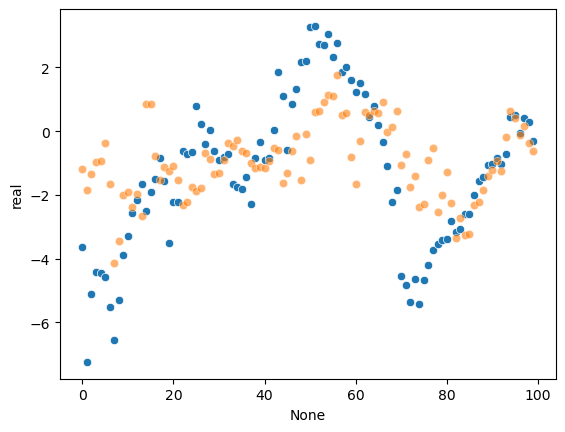

In [64]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)

In [94]:
def detectar_zonas_bajo_volumen(df, bins=80, n_zonas=150):
    """
    Calcula las zonas de bajo volumen (LVN) a partir de un perfil de volumen simple.

    bins: número de niveles de precios en el histograma
    n_zonas: cantidad de zonas de bajo volumen que quieres identificar
    """
    # Tomamos precio medio de cada vela
    df["precio_medio"] = (df["high"] + df["low"]) / 2
    precios = df["precio_medio"]
    volumenes = df["volume"]

    # Construir histograma ponderado por volumen
    hist, edges = np.histogram(precios, bins=bins, weights=volumenes)

    # Normalizamos
    hist = hist / hist.max()

    # Detectar los índices de menor volumen
    indices_lv = np.argsort(hist)[:n_zonas]
    zonas_bajo_volumen = [(edges[i], edges[i+1], hist[i]) for i in indices_lv]
   
    return zonas_bajo_volumen, hist, edges
zbv=detectar_zonas_bajo_volumen(df_porcentual)


In [97]:
#zonas de bajo volumen
df_porcentual["bajo_volumen"]=0
for i in zbv[0]:
    down=list(df_porcentual["close"].round(-3)).index(round(float(i[0]),-3))
    up=list(df_porcentual["close"].round(-3)).index(round(float(i[1]),-3))
    for o in range(1000):
        if df_porcentual["close"][o]==o:
            break
        elif df_porcentual["close"][o]!=o:
            df_porcentual.loc[o,"bajo_volumen"]=1

            






In [35]:
#agregar las zonas de bajo volumen
for i in zbv[0]:
    for o in i:
        print(o)

122510.464625
123862.95
0.0011622287707119192
31893.944499999998
33246.429875
0.002680333018541581
121157.97924999999
122510.464625
0.0030933974698448795
119805.493875
121157.97924999999
0.004393186043904317
76525.961875
77878.44725
0.007116211452677171
73820.991125
75173.4765
0.007509938767265073
49476.254375000004
50828.73974999999
0.007753049300728211
48123.769
49476.254375000004
0.007985578362468092
77878.44725
79230.932625
0.008633290138246388
72468.50575
73820.991125
0.009739660495129912
113043.067
114395.552375
0.01087539515555622
75173.4765
76525.961875
0.01179823191758146
80583.41799999999
81935.903375
0.013152582314774449
52181.225125
53533.7105
0.01330849603132304
111690.58162499999
113043.067
0.013864454834059797
118453.0085
119805.493875
0.014040884851632773
110338.09624999999
111690.58162499999
0.014141770896905886
115748.03774999999
117100.52312499999
0.01531437451615975
114395.552375
115748.03774999999
0.015323641332676817
53533.7105
54886.195875000005
0.016079364255521